<a href="https://colab.research.google.com/github/AnshHarjai/twitter_sentiment_anlysis/blob/main/NLP_LSTM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tensorflow Version 2.14.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install Keras-Preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/ref_tweets.csv')
df = df.drop(['ID', 'Date Created', 'Number of Likes'], axis=1)
# df['Sentiment'] = df['Sentiment'].replace('Neutral', 'Positive')
df.rename(columns={'Tweet': 'text'}, inplace=True)
df.head()

,text,Sentiment
0,The first female referee at a Men’s World Cup ...,Neutral
1,North Korea will host the World Cup in 2030. W...,Neutral
2,If you're wondering why there has been so much...,Neutral
3,NFL referee: “We will scrutinize every angle o...,Negative
4,"Possibly imagining it, but feel like there are...",Neutral


In [ ]:
#PreProcessing
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df.text = df.text.apply(lambda x: preprocess(x))
df.head()

,text,Sentiment
0,first female referee men world cup philly tough,Neutral
1,north korea host world cup 2030 winning north ...,Neutral
2,wondering much stoppage time world cup check l...,Neutral
3,nfl referee scrutinize every angle tape determ...,Negative
4,possibly imagining feel like fewer caustic pla...,Neutral


In [ ]:
#Train And Test Split
TRAIN_SIZE = 0.8
MAX_SEQUENCE_LENGTH = 30

y = df['Sentiment']

train_data, test_data, _, _ = train_test_split(df, y, test_size=1-TRAIN_SIZE,
                                         random_state=7, stratify=y)
print("Train Data size:",len(train_data))
print("Test Data size", len(test_data))
# train_data.head(10)

Train Data size: 3200
Test Data size 800


In [ ]:
#Tokenization
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 6625


In [ ]:
print(word_index)

{'world': 1, 'cup': 2, 'referee': 3, 'ref': 4, 'worldcup': 5, 'game': 6, 'fifaworldcup': 7, 'match': 8, 'argentina': 9, 'england': 10, 'time': 11, 'penalty': 12, 'var': 13, 'france': 14, 'fifa': 15, 'get': 16, 'first': 17, 'messi': 18, 'one': 19, 'final': 20, 'team': 21, 'win': 22, 'like': 23, 'worst': 24, 'football': 25, 'qatar': 26, 'even': 27, 'never': 28, 'see': 29, 'players': 30, 'ever': 31, 'yellow': 32, 'vs': 33, 'goal': 34, 'got': 35, 'qatar2022': 36, 'far': 37, 'card': 38, 'would': 39, 'well': 40, 'worldcup2022': 41, 'bad': 42, 'play': 43, '2': 44, 'go': 45, 'us': 46, 'best': 47, 'let': 48, 'give': 49, 'good': 50, 'player': 51, '1': 52, 'games': 53, 'still': 54, 'ghana': 55, 'another': 56, 'last': 57, 'know': 58, 'decisions': 59, 'make': 60, 'amp': 61, 'every': 62, 'call': 63, 'refs': 64, 'think': 65, 'seen': 66, 'better': 67, 'men': 68, 'watching': 69, 'way': 70, 'going': 71, 'tournament': 72, 'penalties': 73, 'referees': 74, 'morocco': 75, 'fuck': 76, 'much': 77, 'shit': 78,

In [ ]:
from keras_preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (3200, 30)
Testing X Shape: (800, 30)


In [ ]:
labels = train_data.Sentiment.unique().tolist()
print(labels)

['Negative', 'Neutral', 'Positive']


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_data.Sentiment.to_list())

y_train = encoder.transform(train_data.Sentiment.to_list())
y_test = encoder.transform(test_data.Sentiment.to_list())

# Convert the labels to one-hot encoding
num_classes = len(encoder.classes_)
y_train = (y_train[:, np.newaxis] == np.arange(num_classes)).astype(int)
y_test = (y_test[:, np.newaxis] == np.arange(num_classes)).astype(int)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (3200, 3)
y_test shape: (800, 3)


In [ ]:
# #Word Embedding
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip

In [ ]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 25
MODEL_PATH = 'best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

embedding matrix has keys which are the tokens,
and values which are the 300 glove vectors

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False) # this means that the pre-trained glove vectors in the embedding matrix are not updated during back-propogation


In [ ]:
#Model Training
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 30, 300)           1987500   
                                                                 
 spatial_dropout1d_4 (Spati  (None, 30, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_3 (Conv1D)           (None, 26, 64)            96064     
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 256)               3302

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")


Training on GPU...


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=10,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
100/100 [==============================] - 47s 111ms/step - loss: 0.9172 - accuracy: 0.5500 - val_loss: 0.8051 - val_accuracy: 0.6325 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - 10s 105ms/step - loss: 0.7954 - accuracy: 0.6372 - val_loss: 0.7427 - val_accuracy: 0.6750 - lr: 0.0010
Epoch 3/10
100/100 [==============================] - 11s 110ms/step - loss: 0.7155 - accuracy: 0.6853 - val_loss: 0.7343 - val_accuracy: 0.6662 - lr: 0.0010
Epoch 4/10
100/100 [==============================] - 10s 104ms/step - loss: 0.6486 - accuracy: 0.7103 - val_loss: 0.7284 - val_accuracy: 0.6750 - lr: 0.0010
Epoch 5/10
100/100 [==============================] - 11s 106ms/step - loss: 0.5660 - accuracy: 0.7581 - val_loss: 0.8035 - val_accuracy: 0.6575 - lr: 0.0010
Epoch 6/10
100/100 [==============================] - 11s 109ms/step - loss: 0.4637 - accuracy: 0.8138 - val_loss: 0.7978 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 7/10
100/100 [==============================] 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

scores = model.predict(x_test)

25/25 [==============================] - 1s 17ms/step


In [ ]:
predicted_classes = np.argmax(scores, axis=1)
decoded_predictions = encoder.inverse_transform(predicted_classes)
y_test, y_pred = list(test_data.Sentiment), decoded_predictions
accuracy = accuracy_score(y_test, y_pred)
print('Overall accuracy of the model is: ', accuracy)

Overall accuracy of the model is:  0.645


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.70      0.84      0.76       426
     Neutral       0.60      0.40      0.48       279
    Positive       0.47      0.49      0.48        95

    accuracy                           0.65       800
   macro avg       0.59      0.58      0.57       800
weighted avg       0.64      0.65      0.63       800



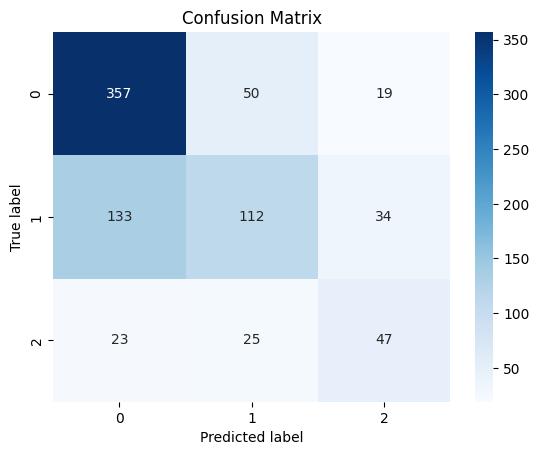

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
y_pred = list(y_pred)

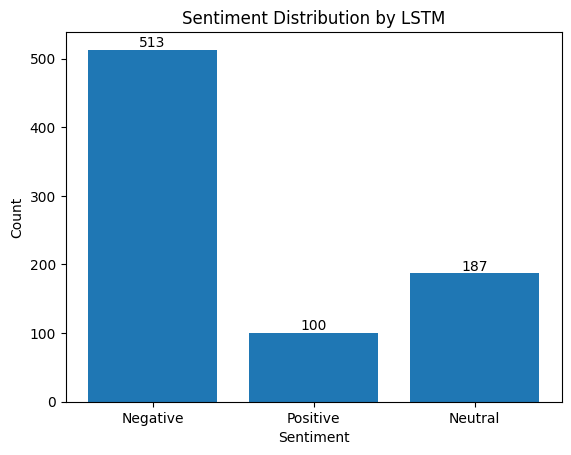

In [ ]:
#Plot and Visualize the Counts
counts = {value: y_pred.count(value) for value in set(y_pred)}

# Extract the unique values and their corresponding counts
unique_values = list(counts.keys())
value_counts = [counts[value] for value in unique_values]

# Create a bar chart
plt.bar(unique_values, value_counts)
# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution by LSTM')

for i, count in enumerate(value_counts):
    plt.text(unique_values[i], count, str(count), ha='center', va='bottom')


# Display the chart
plt.show()

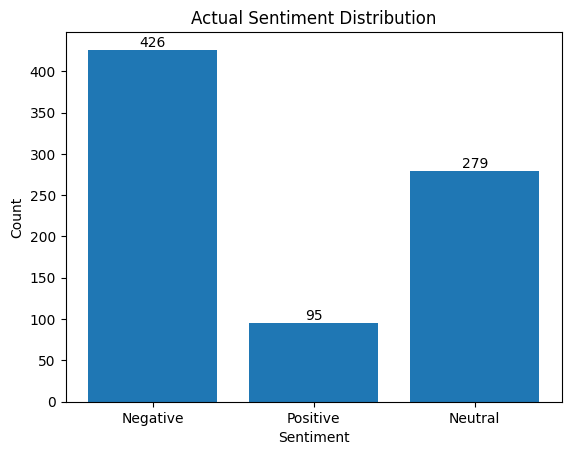

In [ ]:
#Plot and Visualize the Counts
counts = {value: y_test.count(value) for value in set(y_test)}

# Extract the unique values and their corresponding counts
unique_values = list(counts.keys())
value_counts = [counts[value] for value in unique_values]

# Create a bar chart
plt.bar(unique_values, value_counts)
# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Actual Sentiment Distribution')

for i, count in enumerate(value_counts):
    plt.text(unique_values[i], count, str(count), ha='center', va='bottom')


# Display the chart
plt.show()